<a href="https://colab.research.google.com/github/NishitSingh2023/LSTM-in-Trade/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/Project/LSTM-in-Trade

! git pull

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Project/LSTM-in-Trade
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/NishitSingh2023/LSTM-in-Trade
   63a9394..f366a46  master     -> origin/master
Updating 63a9394..f366a46
Fast-forward
 Capstone_Project.ipynb | 1063 ++++++++++++++++

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


In [0]:
df = pd.read_csv('DataSet/TATASTEEL.csv', usecols=['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [5]:
df.count()

Date      4977
Symbol    4977
Open      4977
High      4977
Low       4977
Close     4977
Volume    4977
dtype: int64

In [6]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2000-01-03,TISCO,148.00,153.2,146.10,152.45,2003185
1,2000-01-04,TISCO,150.10,153.0,143.05,150.80,1555136
2,2000-01-05,TISCO,144.60,162.9,144.60,156.55,3840284
3,2000-01-06,TISCO,158.95,169.1,158.95,168.25,2560449
4,2000-01-07,TISCO,173.40,179.0,166.30,171.95,3641691


In [0]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [0]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:4238,:]
valid = dataset[4238:,:]

In [9]:
print(train)

[[152.45]
 [150.8]
 [156.55]
 ...
 [388.45]
 [392.35]
 [391.25]]


In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
print(x_train)

[[[0.0924429 ]
  [0.09065263]
  [0.09689144]
  ...
  [0.03987414]
  [0.04242391]
  [0.0407964 ]]

 [[0.09065263]
  [0.09689144]
  [0.10958607]
  ...
  [0.04242391]
  [0.0407964 ]
  [0.04481094]]

 [[0.09689144]
  [0.10958607]
  [0.11360061]
  ...
  [0.0407964 ]
  [0.04481094]
  [0.05197201]]

 ...

 [[0.33309825]
  [0.34242934]
  [0.35143493]
  ...
  [0.35110942]
  [0.33944556]
  [0.35279119]]

 [[0.34242934]
  [0.35143493]
  [0.35094667]
  ...
  [0.33944556]
  [0.35279119]
  [0.3485054 ]]

 [[0.35143493]
  [0.35094667]
  [0.35002441]
  ...
  [0.35279119]
  [0.3485054 ]
  [0.35273694]]]


In [13]:
model = Sequential()
model.add(LSTM(180, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(180, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print ('compilation time : ', time.time() - start)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

compilation time :  0.027664661407470703


In [19]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4178/4178 [==============================] - 811s 194ms/step - loss: 0.0035
Epoch 2/5
4178/4178 [==============================] - 816s 195ms/step - loss: 0.0021
Epoch 3/5
4178/4178 [==============================] - 813s 195ms/step - loss: 0.0016
Epoch 4/5
4178/4178 [==============================] - 817s 196ms/step - loss: 0.0015
Epoch 5/5
4178/4178 [==============================] - 824s 197ms/step - loss: 0.0014


In [0]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [0]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [17]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

21.554080249128106


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


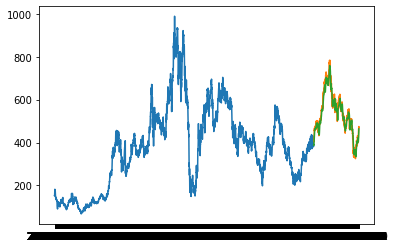

In [18]:
%matplotlib inline

train = new_data[:4238]
valid = new_data[4238:]

valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [0]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y, p(x))